In [1]:
import os
import zipfile

In [2]:
!unzip -q "/content/drive/My Drive/fff/hackerearth.zip"

In [3]:
os.getcwd() 
os.chdir('/content/dataset')
!ls

test  test.csv	train  train.csv


#Importing libraries

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


Looking at different type of dances

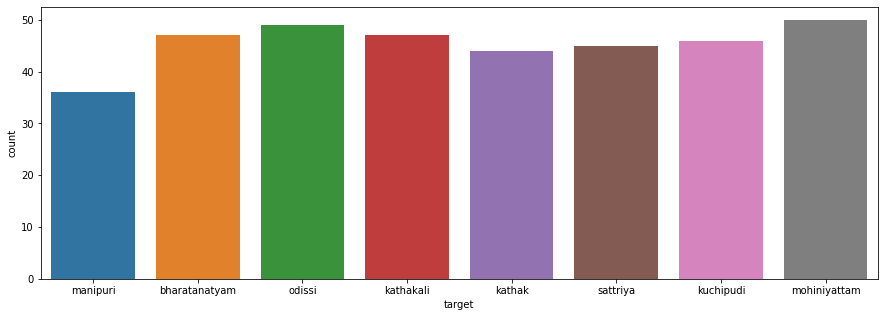

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='target',data=train,)

In [8]:
train.iloc[:,1].value_counts()

mohiniyattam     50
odissi           49
kathakali        47
bharatanatyam    47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

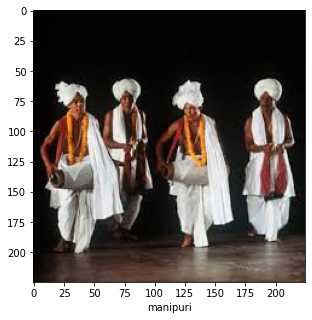

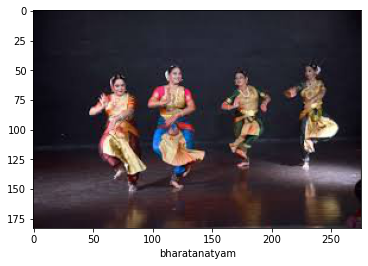

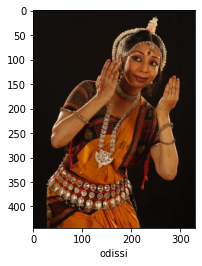

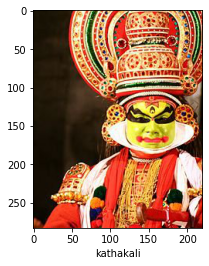

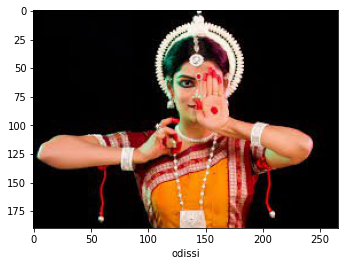

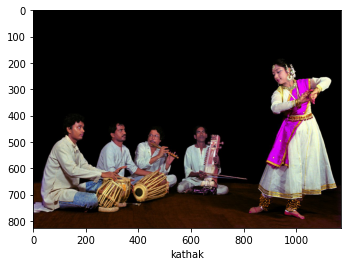

In [ ]:
fig=plt.figure(figsize=(5,5))
for i in range(0,6):
    im=plt.imread('train/'+train['Image'][i])
    plt.imshow(im)
    plt.xlabel(train['target'][i])
    plt.show()

#############

I will be using **Transfer Learing** techinque to train the model

Loading the images and preprocessing them

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    #img = np.expand_dims(img, axis = 0)
    img = preprocess_input(img)
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 364/364 [00:02<00:00, 156.28it/s]


In [11]:
y=train['target']

In [12]:
y=np.array(y)

Converting the target variable(one hot encoding)

In [13]:
from sklearn.preprocessing import LabelEncoder
ld=LabelEncoder()
y=ld.fit_transform(y)

In [14]:
y.shape
y=to_categorical(y)

In [15]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Dividing the data into training and validation

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3,stratify=y)

In [17]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

Using VGG16 model 

In [18]:
#resnet = ResNet50(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
vgg= VGG16(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)
#inception=InceptionV3(input_shape=[224,224]+ [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [19]:
for layer in vgg.layers:
    layer.trainable = False

In [84]:
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu',))
model.add(Dense(8,activation='softmax'))

VGG model

In [75]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)               

In [85]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

**###############################**

In [23]:

train_datagen=ImageDataGenerator(rescale = 1./255,
                                 rotation_range=40,
                                 width_shift_range=0.10,
                                 height_shift_range=0.10,
                                 zoom_range = 0.2,
                                 horizontal_flip = True,
                                 )
validation_datagen=ImageDataGenerator(rescale = 1./255)

In [24]:
train_gen=train_datagen.flow(
    X_train,
    y=y_train,
    batch_size=16,
    shuffle=True
    )

In [25]:
val_gen=validation_datagen.flow(
    X_val,
    y=y_val,
    batch_size=16,
    shuffle=True,
    )

In [26]:
from keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [27]:
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [28]:
earlystop=EarlyStopping(monitor='val-accuracy',min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)

In [29]:
callbacks=[reduce_lr]

In [86]:
r=model.fit_generator(
        train_gen,
  validation_data=val_gen,
  epochs=100,
  verbose=2,
  callbacks=callbacks,
  steps_per_epoch=len(train_gen),
  validation_steps=len(val_gen)
    )

Epoch 1/100
16/16 - 5s - loss: 16.9679 - accuracy: 0.1024 - val_loss: 9.9630 - val_accuracy: 0.1909 - lr: 0.0010
Epoch 2/100
16/16 - 5s - loss: 10.0543 - accuracy: 0.2008 - val_loss: 7.4857 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 3/100
16/16 - 5s - loss: 7.3980 - accuracy: 0.2520 - val_loss: 5.9486 - val_accuracy: 0.4091 - lr: 0.0010
Epoch 4/100
16/16 - 5s - loss: 5.8175 - accuracy: 0.2677 - val_loss: 4.9121 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 5/100
16/16 - 5s - loss: 4.7998 - accuracy: 0.3110 - val_loss: 4.0934 - val_accuracy: 0.4364 - lr: 0.0010
Epoch 6/100
16/16 - 5s - loss: 4.1016 - accuracy: 0.3543 - val_loss: 3.6115 - val_accuracy: 0.4636 - lr: 0.0010
Epoch 7/100
16/16 - 5s - loss: 3.6707 - accuracy: 0.3346 - val_loss: 3.2547 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 8/100
16/16 - 5s - loss: 3.3634 - accuracy: 0.3661 - val_loss: 2.9901 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 9/100
16/16 - 5s - loss: 2.9732 - accuracy: 0.4331 - val_loss: 2.6087 - val_accuracy: 0.6000 - l

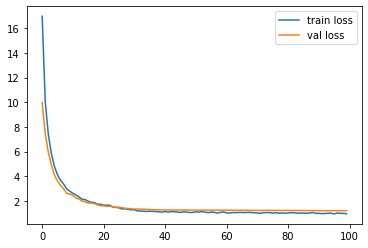

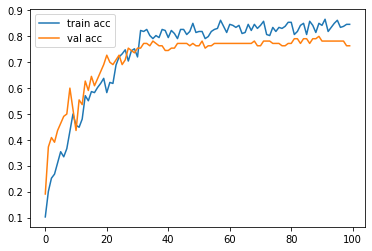

<Figure size 432x288 with 0 Axes>

In [87]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [88]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [89]:
test = pd.read_csv('test.csv')
test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [90]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    #img = np.expand_dims(img, axis = 0)
    img = preprocess_input(img)
    test_image.append(img)
X = np.array(test_image)


100%|██████████| 156/156 [00:01<00:00, 143.40it/s]


In [91]:
prediction = model.predict_classes(X)

In [92]:
prediction=ld.inverse_transform(prediction)

In [93]:
prediction

array(['kuchipudi', 'mohiniyattam', 'kuchipudi', 'kathakali',
       'bharatanatyam', 'kuchipudi', 'kuchipudi', 'kathakali',
       'kuchipudi', 'odissi', 'mohiniyattam', 'kuchipudi', 'mohiniyattam',
       'kuchipudi', 'sattriya', 'bharatanatyam', 'sattriya', 'kathak',
       'mohiniyattam', 'kuchipudi', 'kuchipudi', 'kathakali', 'kathakali',
       'odissi', 'mohiniyattam', 'kathakali', 'mohiniyattam', 'kuchipudi',
       'kuchipudi', 'kuchipudi', 'mohiniyattam', 'kuchipudi', 'kathakali',
       'kuchipudi', 'mohiniyattam', 'kathakali', 'odissi', 'odissi',
       'kathakali', 'kuchipudi', 'kathak', 'kuchipudi', 'kuchipudi',
       'mohiniyattam', 'mohiniyattam', 'kuchipudi', 'kathakali',
       'sattriya', 'kathakali', 'kuchipudi', 'mohiniyattam', 'odissi',
       'manipuri', 'kuchipudi', 'kathakali', 'sattriya', 'kathakali',
       'odissi', 'kuchipudi', 'bharatanatyam', 'kathakali', 'kathakali',
       'odissi', 'kuchipudi', 'kathakali', 'kuchipudi', 'kathakali',
       'kuchipudi'

In [94]:
test=pd.read_csv('test.csv')
test.head()
test.shape

(156, 1)

In [95]:
p=pd.DataFrame(prediction,columns=['target'])

In [96]:
n=pd.concat([test,p],axis=1)


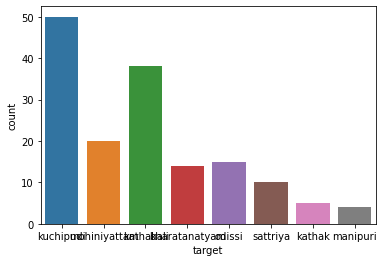

In [97]:
import seaborn as sns
sns.countplot(x='target',data=n)

In [98]:
n

,Image,target
0,508.jpg,kuchipudi
1,246.jpg,mohiniyattam
2,473.jpg,kuchipudi
3,485.jpg,kathakali
4,128.jpg,bharatanatyam
...,...,...
151,366.jpg,sattriya
152,226.jpg,kathakali
153,35.jpg,kuchipudi
154,458.jpg,kathakali


In [ ]:
n.to_csv('deep21',sep='\t',index=False)